In [1]:
pip install textblob



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob  # For sentiment analysis if needed

# Load the dataset
data = pd.read_csv("TMDB_movie_dataset_v11.csv")

In [11]:
 data

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128262,775064,Schoolgirls Holiday,0.000,0,Released,2016-10-20,0,0,True,/f1wBCtJOjr10ntxhAl9KDS3iuBc.jpg,...,Schoolgirls Holiday,Every holiday has its own stories. Get into t...,0.600,/A4xzsrwnUshl3xLwrzXyhVlN4eK.jpg,NaN,NaN,Video Art Holland,NaN,NaN,NaN
1128263,775065,Window,0.000,0,Released,2012-03-26,0,15,False,NaN,...,Logs,"Mr. Schmidt, a young man who is recovering fro...",0.600,/Ad9h4c3c6wpN9e2oZ0bk9STpkRW.jpg,NaN,"Mystery, Drama",Tarhun Sisters,Latvia,NaN,NaN
1128264,775067,How to Get Away With Cheating,0.000,0,Released,2018-01-01,0,105,False,/rTZfGs1d7VHLPQoUMzTWw2wPweQ.jpg,...,How to Get Away With Cheating,Although Professor Alex P. Keating and his wif...,0.600,/xEDLbhYyEBqoWpX8lydrlbrovkt.jpg,NaN,Thriller,NaN,NaN,NaN,NaN
1128265,279414,Once My Mother,0.000,0,Released,2014-07-24,0,75,False,NaN,...,Once My Mother,Australian filmmaker Sophia Turkiewicz investi...,0.600,NaN,NaN,"History, Documentary, War, Family",Change Focus Media,"Ukraine, Australia, Poland",English,"daughter, mother, parent child relationship, r..."


In [24]:
# Convert release_date to year
data['year'] = pd.to_datetime(data['release_date'], errors='coerce').dt.year
data['sentiment'] = data['overview'].apply(lambda x: TextBlob(str(x)).sentiment.polarity if pd.notnull(x) else None)

# 2024年以降のデータを除外
data = data[data['year'] <= 2023]


In [25]:
# 1. Runtime vs Year
def analyze_runtime_vs_year(data):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data.groupby('year')['runtime'].mean().reset_index(), x='year', y='runtime')
    plt.title('Average Movie Runtime Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Runtime (minutes)')
    plt.show()
    

# 2. Runtime by Age Rating
def analyze_runtime_by_age_rating(data):
    # Assuming 'adult' column is used as a proxy for age rating (True for adults, False for general audience)
    data['age_rating'] = data['adult'].apply(lambda x: 'Adult' if x else 'General Audience')
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x='age_rating', y='runtime')
    plt.title('Movie Runtime by Age Rating')
    plt.xlabel('Age Rating')
    plt.ylabel('Runtime (minutes)')
    plt.show()

# 3. Sentiment Analysis (based on overview column)
def analyze_sentiment(data):
    data['sentiment'] = data['overview'].apply(lambda x: TextBlob(str(x)).sentiment.polarity if pd.notnull(x) else None)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='runtime', y='sentiment')
    plt.title('Sentiment vs Runtime')
    plt.xlabel('Runtime (minutes)')
    plt.ylabel('Sentiment Polarity')
    plt.show()

# 4. Genre vs Runtime
def analyze_genre_vs_runtime(data):
    # Split genres into individual entries for each genre in case of multiple genres
    data_expanded = data.dropna(subset=['genres']).copy()
    data_expanded['genres'] = data_expanded['genres'].str.split(', ')
    data_expanded = data_expanded.explode('genres')
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data_expanded, x='genres', y='runtime')
    plt.xticks(rotation=90)
    plt.title('Movie Runtime by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Runtime (minutes)')
    plt.show()

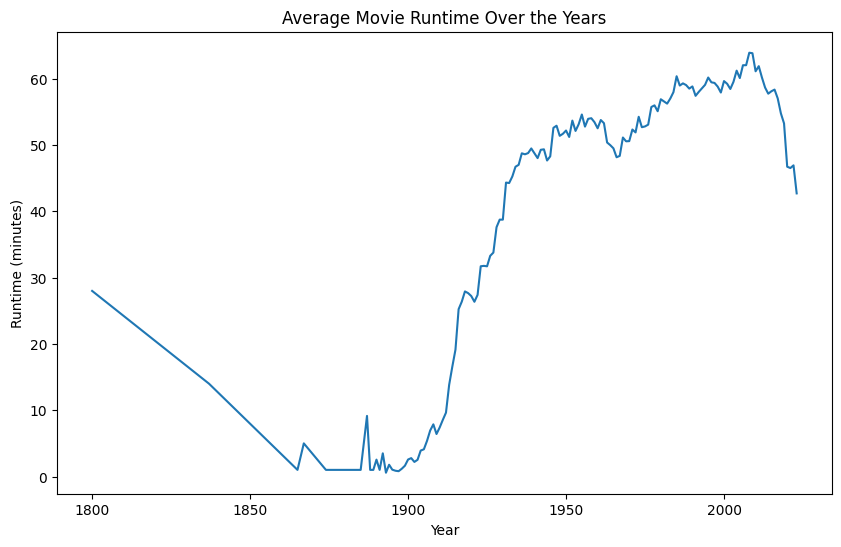

/var/folders/mn/kggw07q91y32xz5gfxsh_5q00000gn/T/ipykernel_75805/4140014277.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_rating'] = data['adult'].apply(lambda x: 'Adult' if x else 'General Audience')


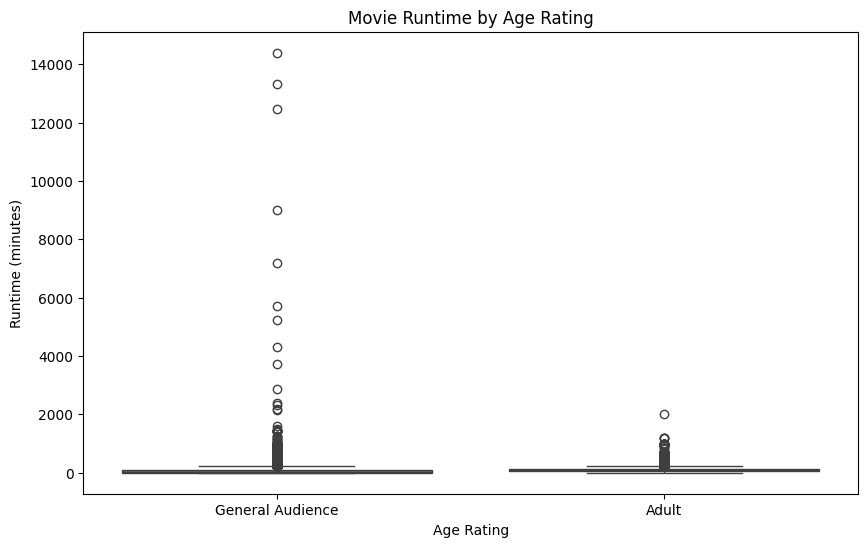

/var/folders/mn/kggw07q91y32xz5gfxsh_5q00000gn/T/ipykernel_75805/4140014277.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['overview'].apply(lambda x: TextBlob(str(x)).sentiment.polarity if pd.notnull(x) else None)


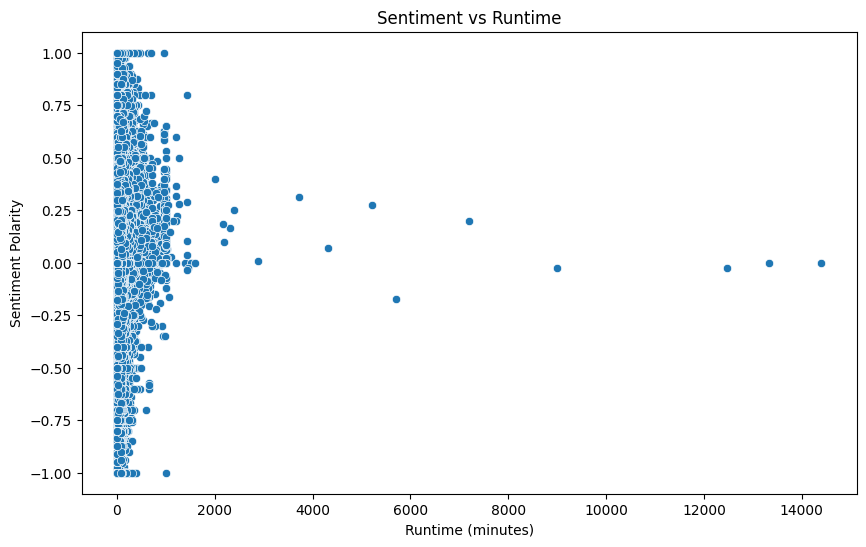

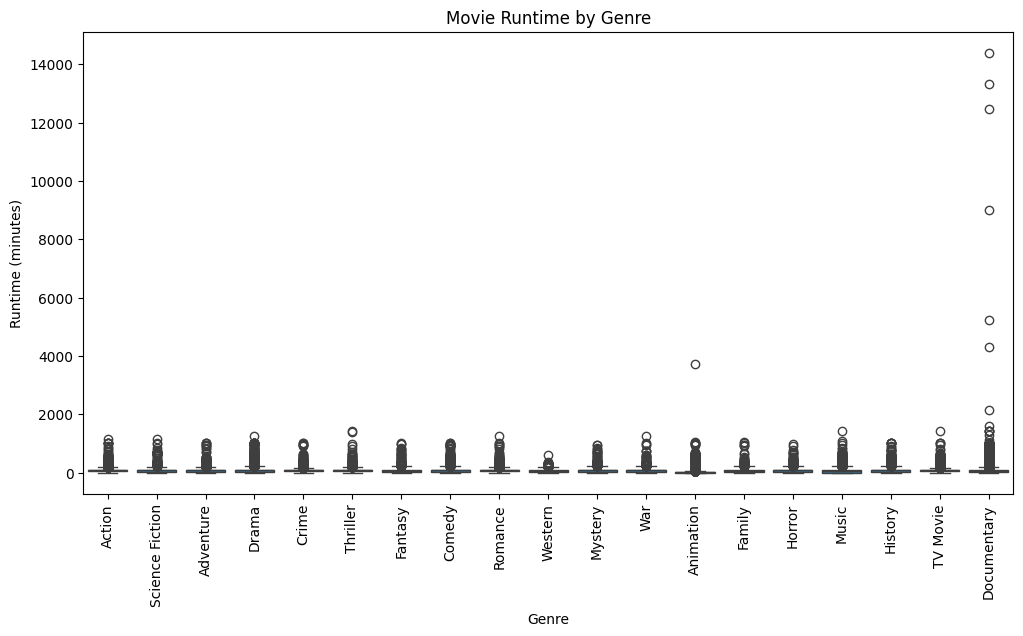

In [26]:
# Run all analyses
analyze_runtime_vs_year(data)
analyze_runtime_by_age_rating(data)
analyze_sentiment(data)
analyze_genre_vs_runtime(data)

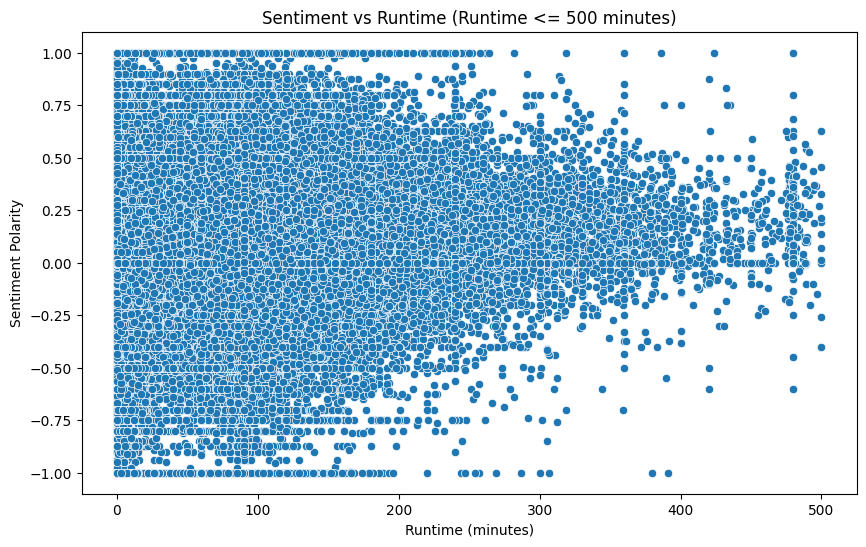

In [27]:

# 外れ値除去：ランタイムを500分以下に限定
filtered_data = data[data['runtime'] <= 500]

# プロット
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='runtime', y='sentiment')
plt.title('Sentiment vs Runtime (Runtime <= 500 minutes)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Sentiment Polarity')
plt.show()


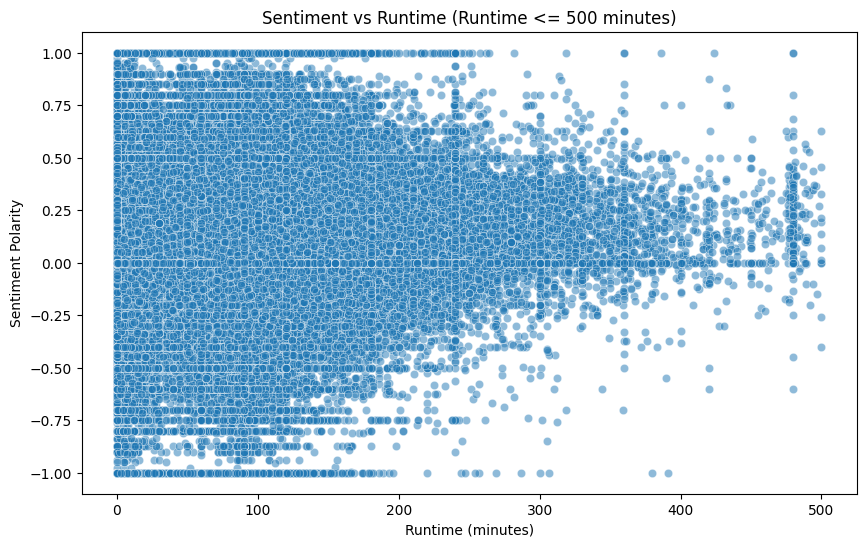

In [28]:
# プロット（透明度を追加）
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='runtime', y='sentiment', alpha=0.5)
plt.title('Sentiment vs Runtime (Runtime <= 500 minutes)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Sentiment Polarity')
plt.show()


In [29]:
data['description_length'] = data['overview'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

/var/folders/mn/kggw07q91y32xz5gfxsh_5q00000gn/T/ipykernel_75805/2942038911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['description_length'] = data['overview'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)


In [30]:
# 1. Runtime vs Sentimentのヒートマップ表示
def analyze_runtime_vs_sentiment_heatmap(data):
    filtered_data = data[(data['runtime'] <= 500) & (data['runtime'] > 0)]
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=filtered_data, x='runtime', y='sentiment', cmap='viridis', fill=True)
    plt.title('Runtime vs Sentiment Heatmap')
    plt.xlabel('Runtime (minutes)')
    plt.ylabel('Sentiment Polarity')
    plt.show()

# 2. 年ごとの感情の傾向（平均感情極性の変化）
def analyze_yearly_sentiment_trend(data):
    yearly_sentiment = data.groupby('year')['sentiment'].mean().dropna()
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=yearly_sentiment)
    plt.title('Average Sentiment Polarity Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Average Sentiment Polarity')
    plt.show()

# 3. ジャンル別の感情分布 (エラー修正: reset_indexを追加)
def analyze_genre_sentiment_distribution(data):
    data_expanded = data.dropna(subset=['genres']).copy()
    data_expanded['genres'] = data_expanded['genres'].str.split(', ')
    data_expanded = data_expanded.explode('genres').reset_index(drop=True)  # インデックスをリセット
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data_expanded, x='genres', y='sentiment')
    plt.xticks(rotation=90)
    plt.title('Sentiment Distribution by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Sentiment Polarity')
    plt.show()

# 4. 人気（popularity）と感情の関係
def analyze_popularity_vs_sentiment(data):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='popularity', y='sentiment', alpha=0.5)
    plt.title('Popularity vs Sentiment')
    plt.xlabel('Popularity')
    plt.ylabel('Sentiment Polarity')
    plt.show()

# 5. 映画の長さ（概要テキスト）と感情
def analyze_description_length_vs_sentiment(data):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='description_length', y='sentiment', alpha=0.5)
    plt.title('Description Length vs Sentiment')
    plt.xlabel('Description Length (words)')
    plt.ylabel('Sentiment Polarity')
    plt.show()

# 6. キーワードの数と感情の関係
def analyze_keyword_count_vs_sentiment(data):
    data['keyword_count'] = data['keywords'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='keyword_count', y='sentiment', alpha=0.5)
    plt.title('Keyword Count vs Sentiment')
    plt.xlabel('Keyword Count')
    plt.ylabel('Sentiment Polarity')
    plt.show()

# 7. 制作国ごとの感情傾向
def analyze_country_vs_sentiment(data):
    data_expanded = data.dropna(subset=['production_countries']).copy()
    data_expanded['production_countries'] = data_expanded['production_countries'].str.split(', ')
    data_expanded = data_expanded.explode('production_countries')
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data_expanded, x='production_countries', y='sentiment')
    plt.xticks(rotation=90)
    plt.title('Sentiment by Production Country')
    plt.xlabel('Production Country')
    plt.ylabel('Sentiment Polarity')
    plt.show()

# 8. 感情と収益の関係
def analyze_revenue_vs_sentiment(data):
    filtered_data = data[data['revenue'] > 0]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=filtered_data, x='revenue', y='sentiment', alpha=0.5)
    plt.title('Revenue vs Sentiment')
    plt.xlabel('Revenue')
    plt.ylabel('Sentiment Polarity')
    plt.show()

# 9. パンデミック前後の感情比較
def analyze_pre_post_pandemic_sentiment(data):
    data['pre_pandemic'] = data['year'] < 2020
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x='pre_pandemic', y='sentiment')
    plt.title('Sentiment Before and After Pandemic')
    plt.xlabel('Pre-Pandemic (True=Before, False=After)')
    plt.ylabel('Sentiment Polarity')
    plt.show()

# 10. 言語ごとの感情分布
def analyze_language_vs_sentiment(data):
    data_expanded = data.dropna(subset=['spoken_languages']).copy()
    data_expanded['spoken_languages'] = data_expanded['spoken_languages'].str.split(', ')
    data_expanded = data_expanded.explode('spoken_languages')
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data_expanded, x='spoken_languages', y='sentiment')
    plt.xticks(rotation=90)
    plt.title('Sentiment by Language')
    plt.xlabel('Language')
    plt.ylabel('Sentiment Polarity')
    plt.show()

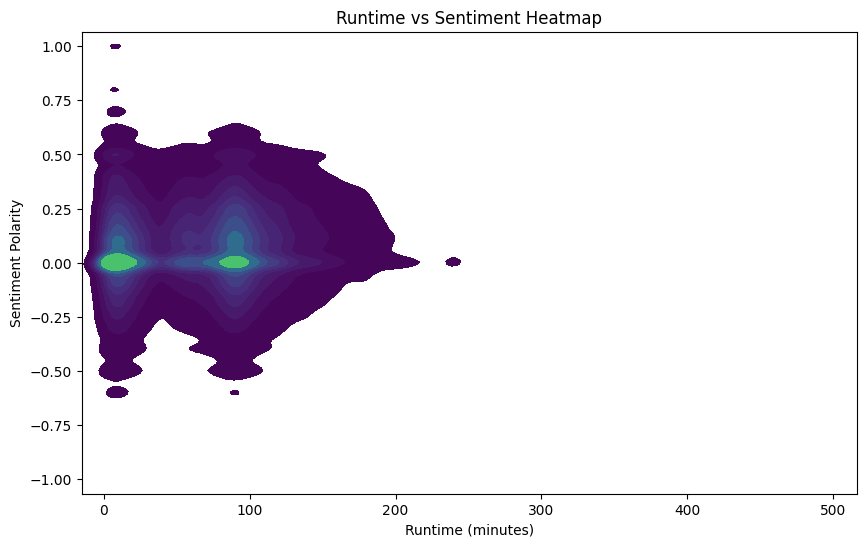

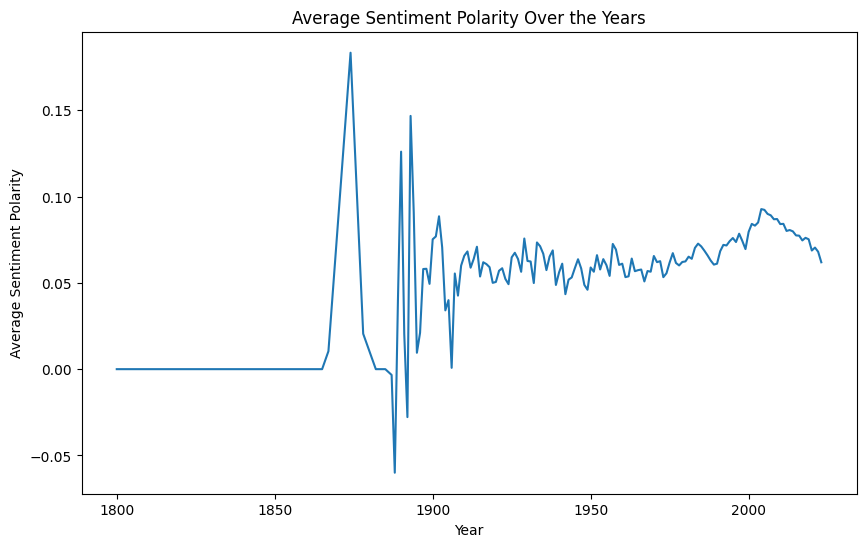

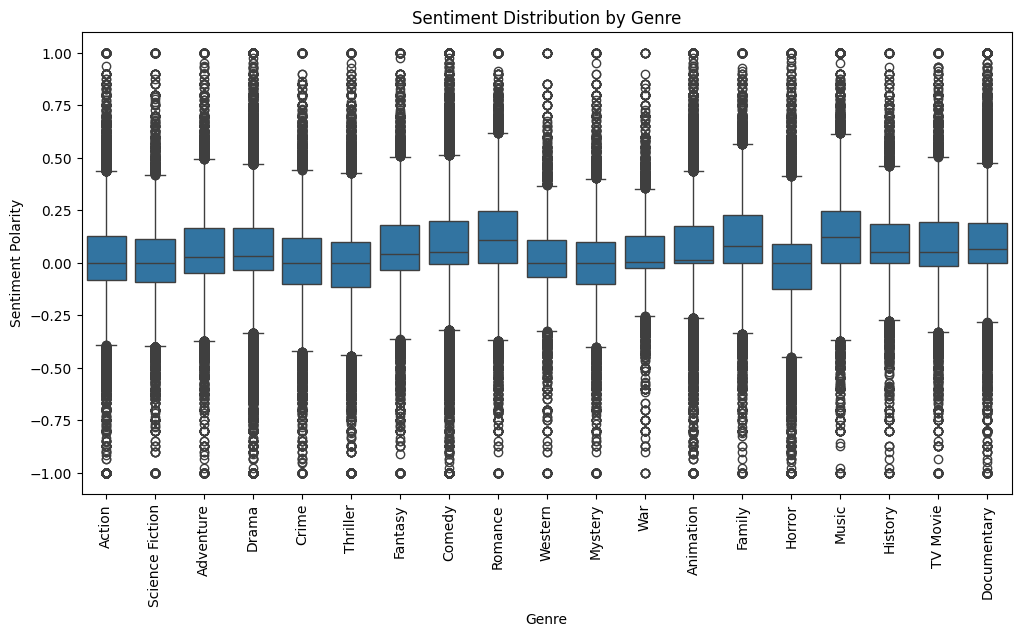

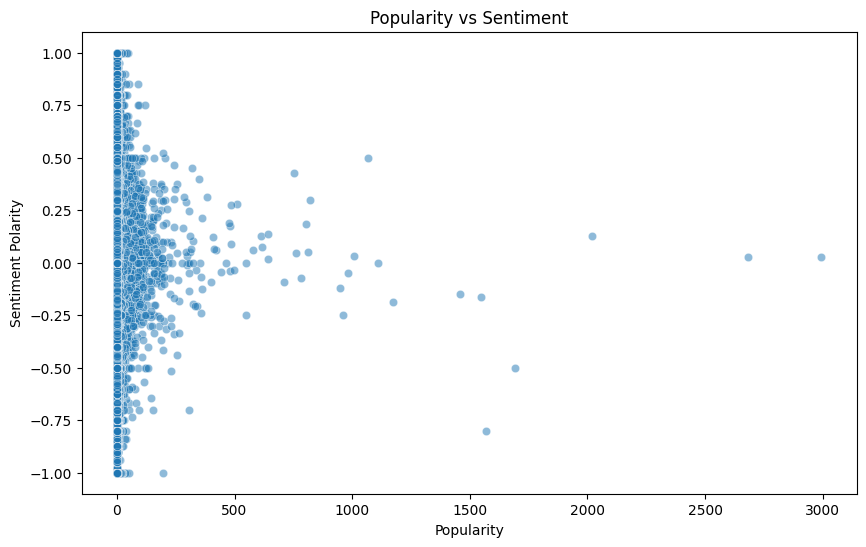

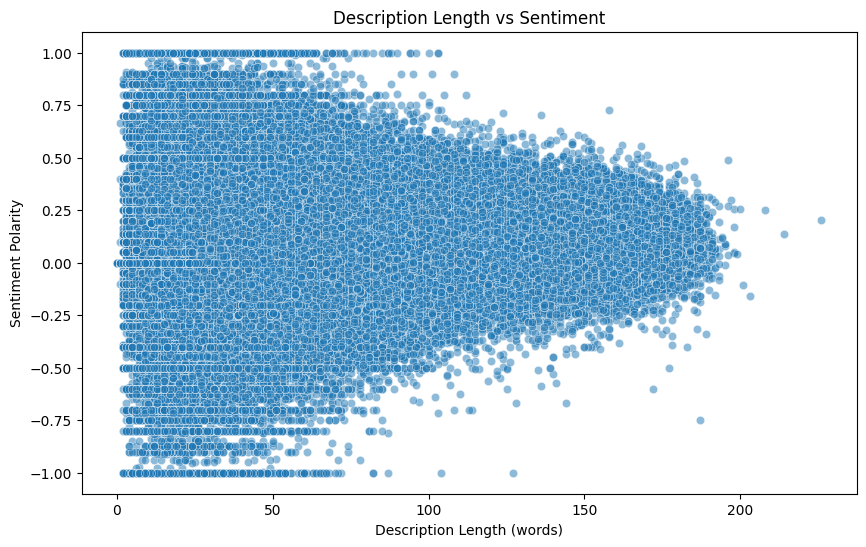

/var/folders/mn/kggw07q91y32xz5gfxsh_5q00000gn/T/ipykernel_75805/47145121.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['keyword_count'] = data['keywords'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)


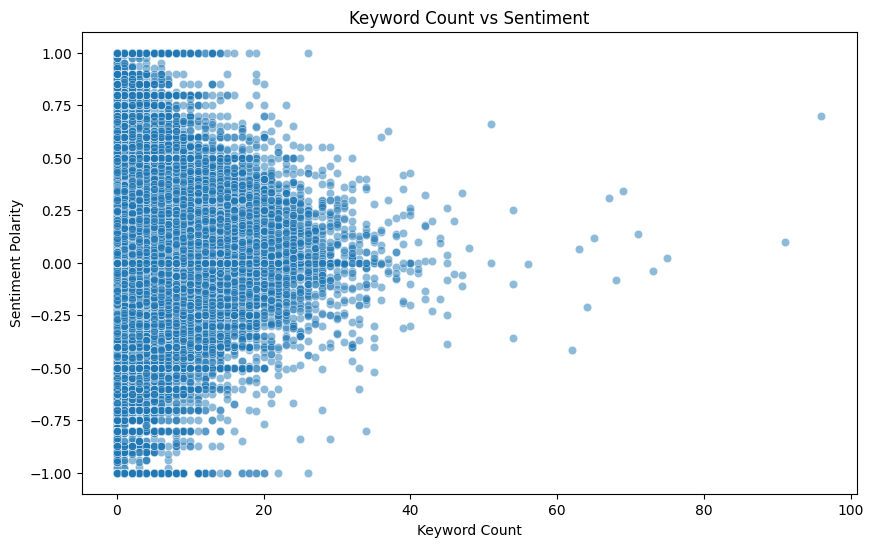

/Users/sayaka/.pyenv/versions/3.10.12/lib/python3.10/site-packages/seaborn/_base.py:1007: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_data.insert(0, var, comp_col)


ValueError: cannot reindex on an axis with duplicate labels

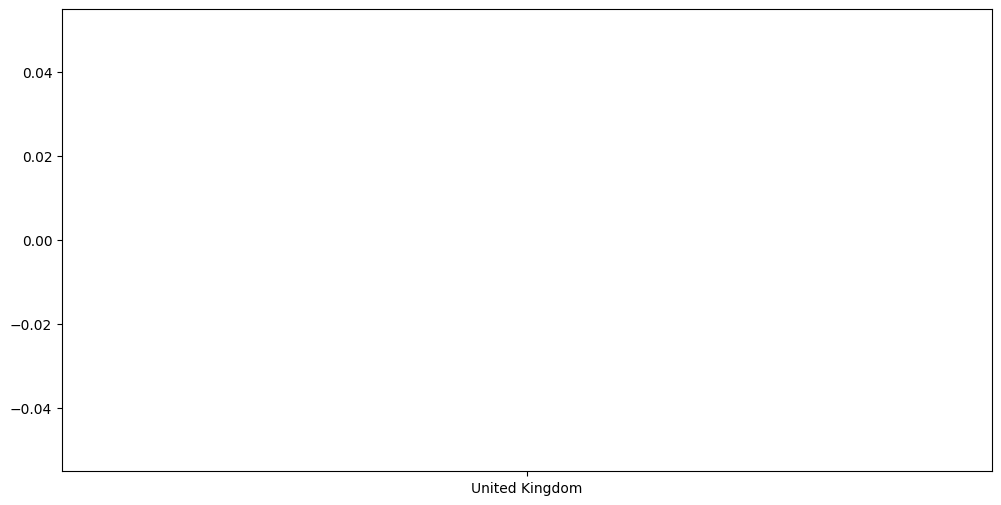

In [31]:

# 各分析の実行
analyze_runtime_vs_sentiment_heatmap(data)
analyze_yearly_sentiment_trend(data)
analyze_genre_sentiment_distribution(data)
analyze_popularity_vs_sentiment(data)
analyze_description_length_vs_sentiment(data)
analyze_keyword_count_vs_sentiment(data)
analyze_country_vs_sentiment(data)
analyze_revenue_vs_sentiment(data)
analyze_pre_post_pandemic_sentiment(data)
analyze_language_vs_sentiment(data)